In [2]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
movie= pd.read_csv('D:/ExcelRassignments/Assignment9/my_movies.csv')
movie.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [4]:
movie_df=movie.iloc[:,5:15]
movie_df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


### Apriori Algorithm

In [5]:
# Apriori(df, min_support=0.4, use_colnames=Ture)

In [6]:
frequent_itemsets=apriori(movie_df, min_support=0.1, use_colnames=True)
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


### Association Rules

In [7]:
rules=association_rules(frequent_itemsets, min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
...,...,...,...,...,...,...,...,...,...
120,"(Sixth Sense, Harry Potter1)","(LOTR1, Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
121,"(Sixth Sense, LOTR2)","(LOTR1, Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
122,"(Green Mile, Harry Potter1)","(Sixth Sense, LOTR1, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
123,"(Green Mile, LOTR2)","(Sixth Sense, LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf


In [8]:
rules[(rules['lift']>=2.5)&
     (rules['confidence']>=1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf
6,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
7,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
9,(LOTR),(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
15,"(Sixth Sense, LOTR1)",(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
...,...,...,...,...,...,...,...,...,...
120,"(Sixth Sense, Harry Potter1)","(LOTR1, Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
121,"(Sixth Sense, LOTR2)","(LOTR1, Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
122,"(Green Mile, Harry Potter1)","(Sixth Sense, LOTR1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
123,"(Green Mile, LOTR2)","(Sixth Sense, LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


### Visualization

In [9]:
import networkx as nx

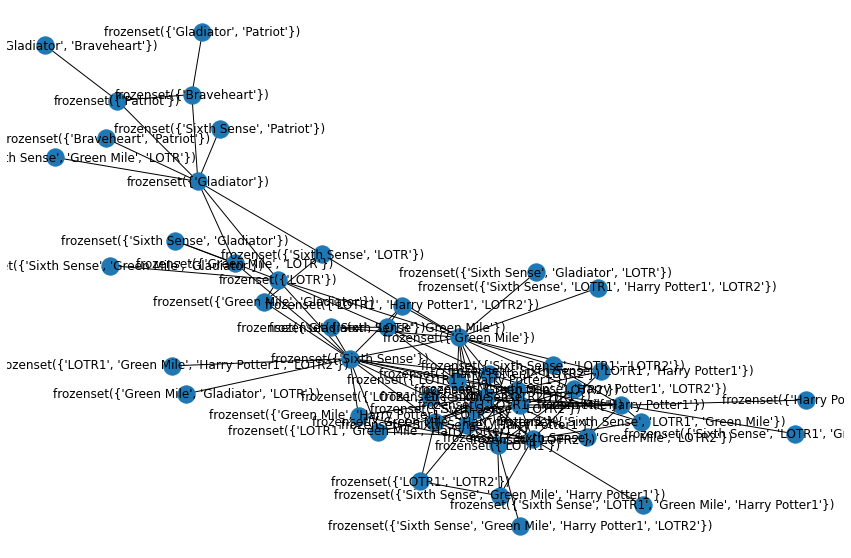

In [10]:
fig, ax=plt.subplots(figsize=(15,10))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

### Support vs Confidence

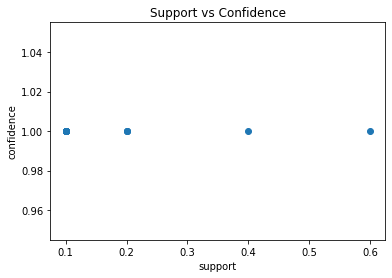

In [11]:
plt.scatter(rules['support'], rules['confidence'], alpha=1)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

### Support vs Lift

<function matplotlib.pyplot.show(close=None, block=None)>

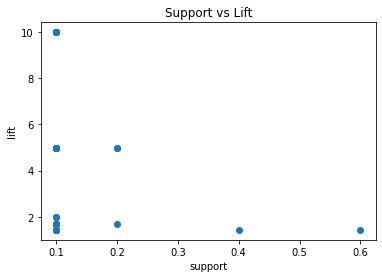

In [12]:
plt.scatter(rules['support'], rules['lift'], alpha=1)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show

### Lift vs Confidence

Text(0.5, 1.0, 'Lift vs Confidence')

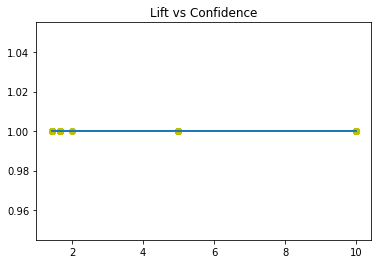

In [13]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))
plt.title('Lift vs Confidence')